# Fasion-MNIST classification 

In this Assignment you are going to classify a fashion dataset.

[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

![](https://www.tensorflow.org/static/tutorials/keras/classification_files/output_oZTImqg_CaW1_0.png)


In [1]:
# Imad Hanzaz, Yannick Urselmann, Jaylong Verschuren

# Initialization

load all needed libraries and functions, 
check the previos tutorial how to correctly load keras and other modules

### Import the needed libraries for this assignment. 

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

print("Current Tensorflow version used is: " + tf.__version__)

Current Tensorflow version used is: 2.11.0


### Create a variable to trigger training of the model or not.
This is done because the whole notebook can be run at once. If a model is trained already, it would be time consuming to create another model.

In [3]:
'''TrainModel = True'''

'TrainModel = True'

# Load dataset & Plot a subset

load your dataset and show a plot of the subset of your data

### Load the Fashion MNIST dataset and divide it into train and test datasets.

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
class_names = ['tshirt_top', 'trouser', 'pullover', 'dress', 'coat',
                'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# Prepare Data

pre-process your raw input data... rescale... normalize....

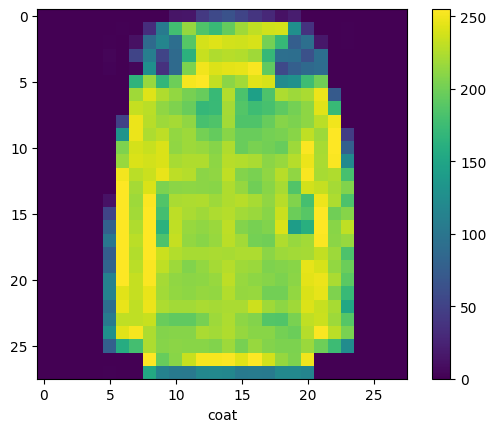

In [7]:
from random import randrange
example_image = randrange(60000)

plt.figure()
plt.imshow(train_images[example_image])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[train_labels[example_image]])
plt.show()

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

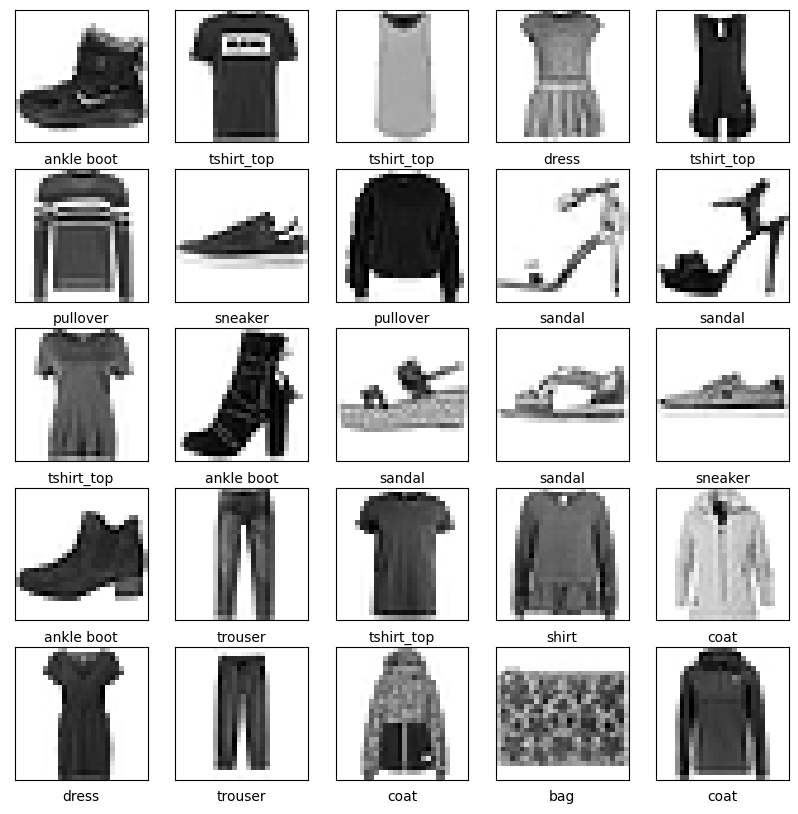

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Fit the Model

Fitting the model is the time consuming part, this depend on the complexity of the model and the amount of training data.
In the fitting process the model is first build up in memory with all the tunable parameters and intercomnnects (with random start values). This is also the limitation of some systems, all these parameters are stored in memory (or when not fitting in a swap file)

**TIP:** do not start the first time with training a lot of epochs, first see if this and all following steps in your system work and when you are sure that all works train your final model. You can also monitor the Jetson CPU/GPU/Memory performance during this process (see Tips & Tricks)

* Explain what hyperparameters are available and what they do.
* Which hyperparameter result in better training results?

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10),
])


In [11]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5042 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 2s 978us/step - loss: 0.3764 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 2s 989us/step - loss: 0.3364 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 2s 992us/step - loss: 0.3145 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 2s 997us/step - loss: 0.2952 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2811 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 2s 976us/step - loss: 0.2688 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 2s 974us/step - loss: 0.2578 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 2s 988us/step - loss: 0.2495 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step

# Evaluate Model

Show the model accuracy after the training process ...
* What is the final accuracy of the trained Network?

In [13]:
val_loss, val_acc = model.evaluate(test_images, test_labels, batch_size= 1)
print(f"Validated loss: {val_loss} , Validated Accuracy: {val_acc}")

10000/10000 [==============================] - 7s 652us/step - loss: 0.3621 - accuracy: 0.8749
Validated loss: 0.3620692789554596 , Validated Accuracy: 0.8748999834060669


# Save model

Save the model for later usage

In [14]:
model.save('saved_models/model'+ str("5"))

INFO:tensorflow:Assets written to: saved_models/model5\assets


INFO:tensorflow:Assets written to: saved_models/model5\assets


# Evaluate Final Model

After training and saving the model you can deploy this model on any given input image. You can start a new application in where you import this model and apply it on any given imput images, so you can just load the model and don't need the timeconsuming training anymore.

In [15]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])


## Make Prediction

We can use our saved model to make a prediction on new images that are not trained on... make sure the input images receive the same pre-processing as the images you trained on.

So fetch some images from the internet (similar classes, but not from your dataset), prepare them to fit your network and classify them. Do this for  **10 images per class** and show the results!

* How good is the detection on you real dataset? (show some statistics) 

In [16]:
'''
from PIL import Image

test_img_folder = "./testset/datasetTest"

IMG_HEIGHT=28
IMG_WIDTH=28

def create_dataset_PIL(img_folder):

    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):

            image_path= os.path.join(img_folder, dir1,  file)
            image= np.array(Image.open(image_path))
            image= np.resize(image,(IMG_HEIGHT,IMG_WIDTH,3))
            image = image.astype('float32')
            image /= 255  
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array , class_name
x_validation, y_validation=create_dataset_PIL(test_img_folder)
x_validation = np.array(x_validation, np.float32)
'''

'\nfrom PIL import Image\n\ntest_img_folder = "./testset/datasetTest"\n\nIMG_HEIGHT=28\nIMG_WIDTH=28\n\ndef create_dataset_PIL(img_folder):\n\n    img_data_array=[]\n    class_name=[]\n    for dir1 in os.listdir(img_folder):\n        for file in os.listdir(os.path.join(img_folder, dir1)):\n\n            image_path= os.path.join(img_folder, dir1,  file)\n            image= np.array(Image.open(image_path))\n            image= np.resize(image,(IMG_HEIGHT,IMG_WIDTH,3))\n            image = image.astype(\'float32\')\n            image /= 255  \n            img_data_array.append(image)\n            class_name.append(dir1)\n    return img_data_array , class_name\nx_validation, y_validation=create_dataset_PIL(test_img_folder)\nx_validation = np.array(x_validation, np.float32)\n'

In [17]:
batch_size = 100
img_height = 28
img_width = 28
test_img_folder = "./testset/datasetTest"

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_img_folder,
    seed=123,
    color_mode= 'grayscale',
    image_size=(img_height, img_width),
    batch_size=batch_size)

class_namesT = test_ds.class_names
print(class_namesT)

Found 100 files belonging to 10 classes.
['ankle boot', 'bag', 'coat', 'dress', 'pullover', 'sandal', 'shirt', 'sneaker', 'trouser', 'tshirt_top']


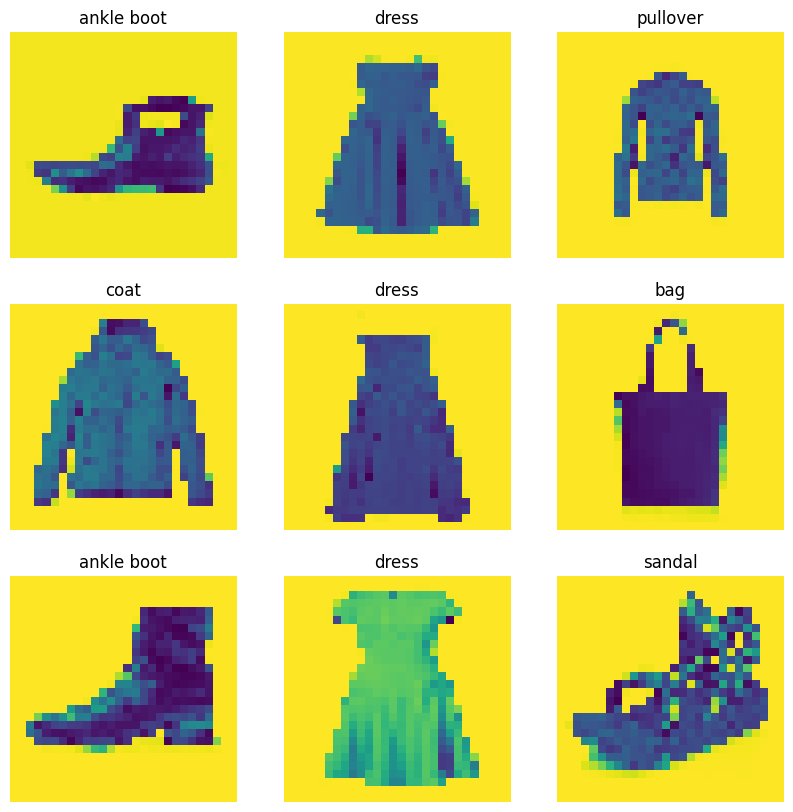

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_namesT[labels[i]])
    plt.axis("off")

In [19]:
def inverseImageBW_array(originalImage):
    temp = 1 - originalImage
    temp = -1.* originalImage
    return temp

In [20]:
for image_batch, labels_batch in test_ds:
    x_validation = image_batch
    y_validation = labels_batch



x_validation = inverseImageBW_array(np.array(x_validation) / 255)
x_validation = np.reshape(x_validation, (100,28,28))
y_validation = np.array(y_validation)

In [21]:
predictions = probability_model.predict_on_batch(x_validation)
predictionClasses = np.argmax(predictions, axis=1)

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

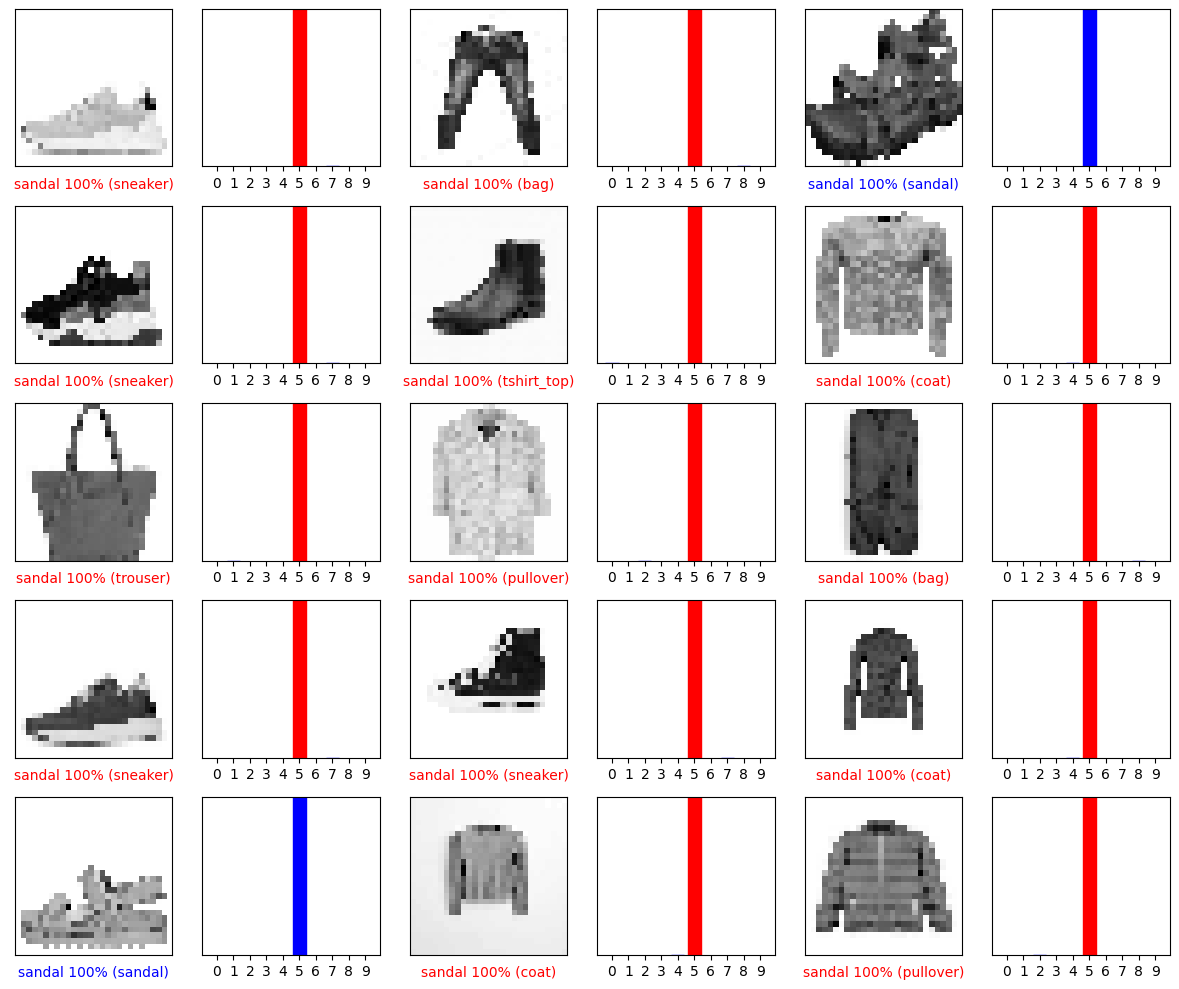

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_validation, x_validation)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_validation)
plt.tight_layout()
plt.show()


## Additional Questions
* In which way could the network accuracy be improved further (only explanation, no implementation)?